In [1]:
import os
from pathlib import Path
#from flame import Machine
import flame
from flame import Machine #Machine() not found without this line
import flame_utils
import numpy as np
import matplotlib.pyplot as plt
import labframePlotFun
%matplotlib inline
#%matplotlib qt #for showing graphs in second window

In [2]:
#Linking to flame/data folder in cwd, and establishing lattice file (.lat)
# latpath definition seems to assume rea-files/ and phantasy-machines/ is in same folder...

#current working dir
cwd = os.getcwd()

#Get path of directory containing flame module
#  (todo: if not found, search rea-files parent directory,
#  or rea3/data/CrispAnalysis/phantasy-machines)
flamedir = os.path.dirname(os.path.abspath(flame.__file__))
# if found, create link in cwd to flame/data folder
if os.path.isfile(flamedir):
    flamedata = flamedir + '/data'
    os.unlink(cwd + '/data')
    os.symlink(flamedata, cwd + '/data')

# define '.lat' latfile
#latfile = "ReA3_JENSA.lat"
#latfile_handle = open(cwd + '/' + latfile, 'rb')
latfile = "baseline_gpl_fully_corrected.lat"
latpath = str(Path(cwd).parent) + '/phantasy-machines/ReA/GPL/' + latfile
latfile_handle = open(latpath, 'rb')
latpath

'/projects/rea3/data/CrispAnalysis/phantasy-machines/ReA/GPL/baseline_gpl_fully_corrected.lat'

In [3]:
# create FLAME machine
m = Machine(latfile_handle)

# create BeamState object
bs = flame_utils.BeamState(machine=m)

# create ModelFlame object
fm = flame_utils.ModelFlame()

In [4]:
# setup machine and state
fm.bmstate, fm.machine = bs, m

In [7]:
m.find(type='quadrupole') # find element index by element name

[138,
 145,
 152,
 173,
 175,
 177,
 223,
 225,
 227,
 229,
 249,
 251,
 253,
 255,
 272,
 274,
 290,
 292,
 305,
 307,
 318,
 328,
 330,
 347,
 349]

In [28]:
m.conf(307).keys() # Parameter keys of element

odict_keys(['B2', 'Eng_Data_Dir', 'HdipoleFitMode', 'IonChargeStates', 'IonEk', 'IonEs', 'L', 'MpoleLevel', 'NCharge', 'P0', 'S0', 'aper', 'name', 'sim_type', 'type'])

In [29]:
m.conf(307)['B2'] # Quadrupole Strength

-12.5

In [10]:
####################
# Quadrupole Scan  #
####################

In [11]:
# Quad Name
m.conf(307)['name']

'REA_BTS30:Q_D1351'

In [12]:
# Initial Quad Strength
ini = m.conf(307)['B2']
ini

-9.10184

In [13]:
# run simulation up to target element
SA = m.allocState({})
rA = m.propagate(SA, 0, 307, observe=range(len(m))) # propagate up to quad we're scanning

# scan parameters by using single loop
b2lst = [-5.0, -7.5, -10, -12.5] # Quad strengths
rlst = []
for b2 in b2lst:
    SB = SA.clone()
    m.reconfigure(307, {'B2':b2})
    rt = m.propagate(SB,307,360,observe=range(len(m))) # range(len(m)) is 0, 360
    rlst.append(rt)

In [14]:
rA[305:]

[(305,
  State: moment0 mean=[7](-0.0309184,5.47862e-05,0.00468362,-1.2209e-06,0.000251882,0,1)),
 (306,
  State: moment0 mean=[7](-0.020509,5.47862e-05,0.00445165,-1.2209e-06,0.000251882,0,1))]

In [15]:
rA[-1][1].pos

31.556129999999975

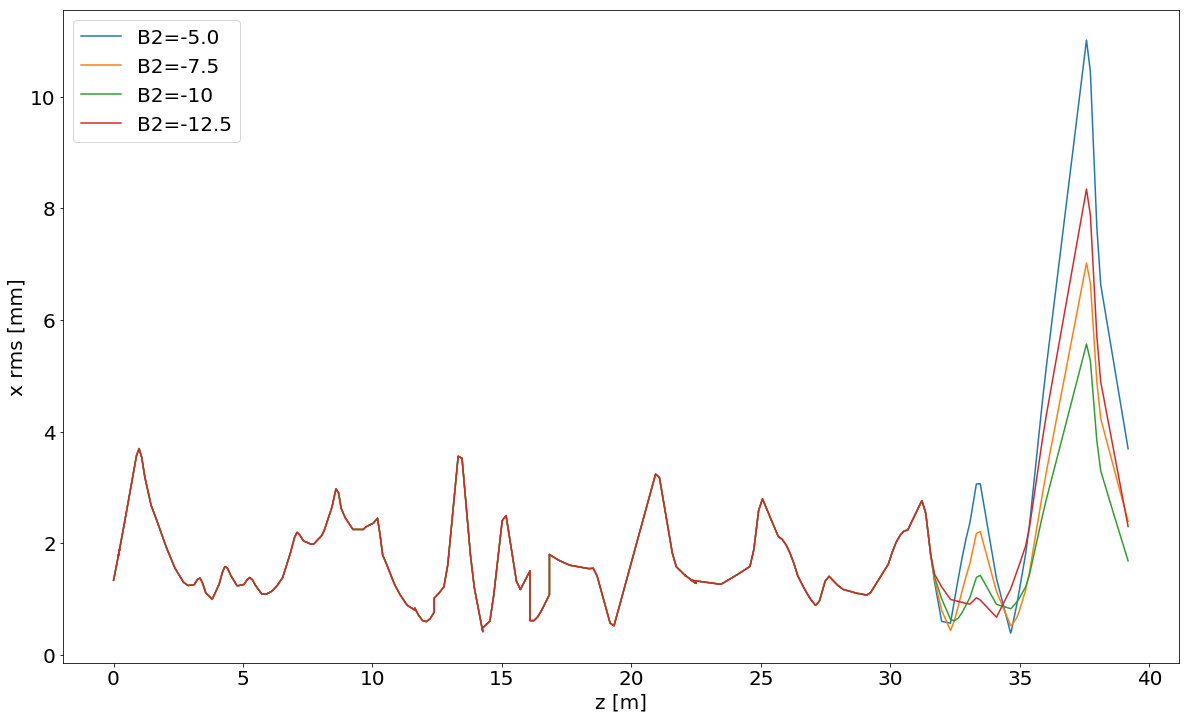

In [16]:
# plot the scan result

# get z-position and x-rms data from before scanned quad
zA = [s[1].pos for s in rA] # get z positions of elements
xA = [s[1].moment0_rms[0] for s in rA] # get the x rms size at location of elements

# append resulting x-rms data to pre-quad data
#  for a given run at quad strength b2lst
for b2,rt in zip(b2lst,rlst):
    zt = zA + [s[1].pos for s in rt] # join the history result
    xt = xA + [s[1].moment0_rms[0] for s in rt]
    plt.plot(zt, xt, label='B2='+str(b2))

plt.ylabel('x rms [mm]')
plt.xlabel('z [m]')
plt.legend(loc='best')
plt.show()